In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Ensure inline plotting
%matplotlib inline

In [2]:
# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Football.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Country,League,home_team,away_team,home_score,away_score,season_year,Date_day,Date_hour,first_half,...,Distance_Covered_(km)_Home,Distance_Covered_(km)_Host,Clearances_Completed_Home,Clearances_Completed_Host,Pass_Success_per_Home,Pass_Success_per_Host,referee,venue,capacity,attendance
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3.11,19:30,3 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Dankert B. (Ger),Borussia-Park (Mönchengladbach),54 042,54 042
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,3.11,17:30,0 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Brand B. (Ger),Europa-Park Stadion (Freiburg),34 700,34 400
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,2.11,20:30,1 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Stieler T. (Ger),Signal Iduna Park (Dortmund),81 365,81 365
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2.11,17:30,2 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jollenbeck M. (Ger),Allianz Arena (Munich),75 024,75 000
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,2.11,17:30,4 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Schlager D. (Ger),Deutsche Bank Park (Frankfurt),58 000,58 000


In [3]:
df.isnull().sum()

Country                      0
League                       0
home_team                    0
away_team                    0
home_score                   0
                         ...  
Pass_Success_per_Host    95371
referee                  52476
venue                    25828
capacity                 25833
attendance               64590
Length: 91, dtype: int64

In [4]:
# Convert score columns to numeric
df['home_score'] = pd.to_numeric(df['home_score'], errors='coerce')
df['away_score'] = pd.to_numeric(df['away_score'], errors='coerce')

# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['season_year'] + '-' + df['Date_day'].astype(str) + ' ' + df['Date_hour'], errors='coerce')

# Drop columns with excessive missing values
df.dropna(axis=1, thresh=int(0.5*len(df)), inplace=True)

# Drop rows with missing scores
df.dropna(subset=['home_score', 'away_score'], inplace=True)

# Display the cleaned dataset
df.head()

,Country,League,home_team,away_team,home_score,away_score,season_year,Date_day,Date_hour,first_half,second_half,venue,capacity
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4.0,1.0,2024/2025,3.11,19:30,3 - 0,1 - 1,Borussia-Park (Mönchengladbach),54 042
1,Germany,Bundesliga,Freiburg,Mainz,0.0,0.0,2024/2025,3.11,17:30,0 - 0,0 - 0,Europa-Park Stadion (Freiburg),34 700
2,Germany,Bundesliga,Dortmund,RB Leipzig,2.0,1.0,2024/2025,2.11,20:30,1 - 1,1 - 0,Signal Iduna Park (Dortmund),81 365
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3.0,0.0,2024/2025,2.11,17:30,2 - 0,1 - 0,Allianz Arena (Munich),75 024
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7.0,2.0,2024/2025,2.11,17:30,4 - 1,3 - 1,Deutsche Bank Park (Frankfurt),58 000


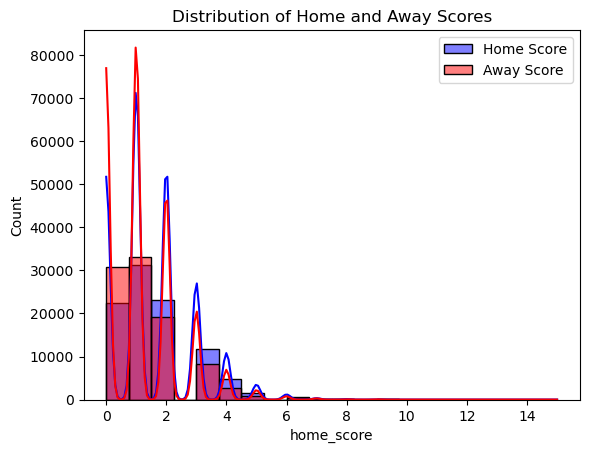

In [5]:
# Distribution of home and away scores
sns.histplot(df['home_score'], bins=20, kde=True, color='blue', label='Home Score')
sns.histplot(df['away_score'], bins=20, kde=True, color='red', label='Away Score')
plt.legend()
plt.title('Distribution of Home and Away Scores')
plt.show()

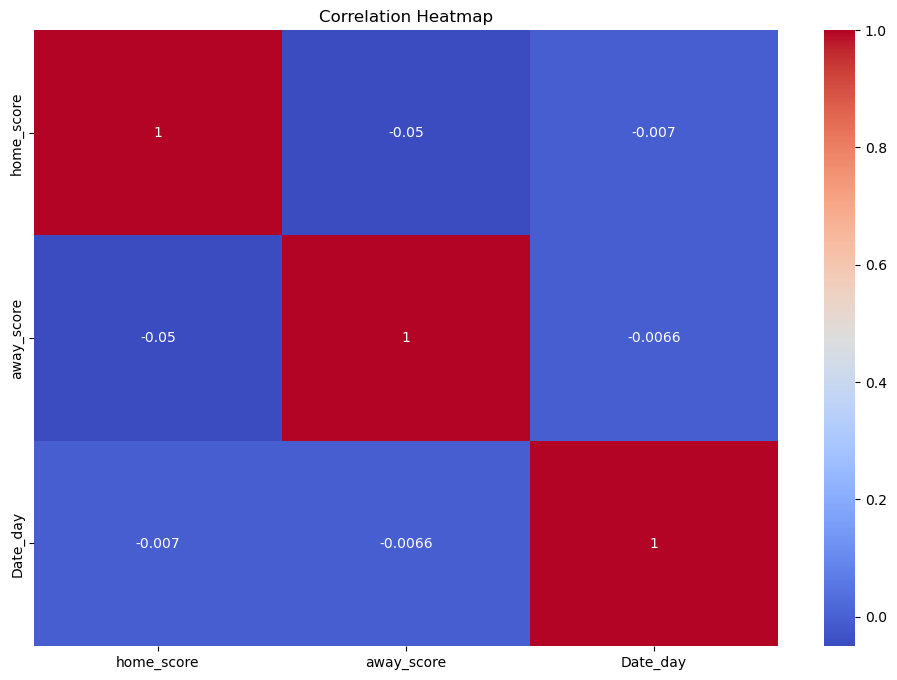

In [6]:
# Correlation heatmap for numeric features
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Create match outcome feature
def match_outcome(row):
    if row['home_score'] > row['away_score']:
        return 'Win'
    elif row['home_score'] < row['away_score']:
        return 'Loss'
    else:
        return 'Draw'

df['match_outcome'] = df.apply(match_outcome, axis=1)

# Display the updated dataset
df.head()

,Country,League,home_team,away_team,home_score,away_score,season_year,Date_day,Date_hour,first_half,second_half,venue,capacity,match_outcome
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4.0,1.0,2024/2025,3.11,19:30,3 - 0,1 - 1,Borussia-Park (Mönchengladbach),54 042,Win
1,Germany,Bundesliga,Freiburg,Mainz,0.0,0.0,2024/2025,3.11,17:30,0 - 0,0 - 0,Europa-Park Stadion (Freiburg),34 700,Draw
2,Germany,Bundesliga,Dortmund,RB Leipzig,2.0,1.0,2024/2025,2.11,20:30,1 - 1,1 - 0,Signal Iduna Park (Dortmund),81 365,Win
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3.0,0.0,2024/2025,2.11,17:30,2 - 0,1 - 0,Allianz Arena (Munich),75 024,Win
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7.0,2.0,2024/2025,2.11,17:30,4 - 1,3 - 1,Deutsche Bank Park (Frankfurt),58 000,Win


In [8]:
# Encode categorical features
label_encoder = LabelEncoder()
df['home_team'] = label_encoder.fit_transform(df['home_team'])
df['away_team'] = label_encoder.fit_transform(df['away_team'])
df['match_outcome'] = label_encoder.fit_transform(df['match_outcome'])

# Define features and target variable
features = ['home_team', 'away_team', 'home_score', 'away_score']
X = df[features]
y = df['match_outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict the outcomes on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()